<a href="https://colab.research.google.com/github/mobuktodae/AI_Practice/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Setting

pip upgrade 후 tensorflow 설치함


In [5]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [12]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 예제코드 실행

In [9]:
# 5-1.py

import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))


2.12.0
tf.Tensor(
[[0.9753039  0.62675333 0.11984277]
 [0.37261093 0.8997611  0.87203   ]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [10]:
# 5-2.py

import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.37375915 0.618461   0.36528528]
 [0.06236422 0.8952893  0.4652288 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.21141207 0.38293321 0.19112623]
 [0.83235158 0.81082381 0.60551026]] 

덧셈 결과:
 tf.Tensor(
[[0.5851712 1.0013943 0.5564115]
 [0.8947158 1.7061131 1.070739 ]], shape=(2, 3), dtype=float32)


In [14]:
#5-3.py

import tensorflow as tf
import keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) # 원핫 코드로 변환
print("MNIST: ",x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10: ",x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing: ",x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuters: ",x_train.shape,y_train.shape)

MNIST:  (60000, 28, 28) (60000,) (60000, 10)
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
Boston Housing:  (404, 13) (404,)
Reuters:  (8982,) (8982,)


In [15]:
#5-4.py

import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# [그림 4-3(b)]의 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)


tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [16]:
# 5-5.py

import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

# 옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(식 (4.3))
def forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s)
    return o

# 손실 함수 정의
def loss():
    o=forward()
    return tf.reduce_mean((y-o)**2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss, var_list=[w,b])
    if(i%100==0): print('loss at epoch',i,'=',loss().numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.7914045
loss at epoch 100 = 0.091796815
loss at epoch 200 = 0.042331003
loss at epoch 300 = 0.026604727
loss at epoch 400 = 0.019158127
tf.Tensor(
[[-0.8161938]
 [ 0.8863335]
 [ 0.8862481]
 [ 0.9992647]], shape=(4, 1), dtype=float32)


In [19]:
# 5-6.py

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 0.9208 - mse: 0.9208 - 261ms/epoch - 261ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7074 - mse: 0.7074 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6146 - mse: 0.6146 - 7ms/epoch - 7ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5672 - mse: 0.5672 - 8ms/epoch - 8ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5375 - mse: 0.5375 - 7ms/epoch - 7ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5157 - mse: 0.5157 - 7ms/epoch - 7ms/step
Epoch 7/500
1/1 - 0s - loss: 0.4979 - mse: 0.4979 - 7ms/epoch - 7ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4823 - mse: 0.4823 - 17ms/epoch - 17ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4680 - mse: 0.4680 - 7ms/epoch - 7ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4547 - mse: 0.4547 - 7ms/epoch - 7ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4420 - mse: 0.4420 - 8ms/epoch - 8ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4300 - mse: 0.4300 - 8ms/epoch - 8ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4183 - mse: 0.4183 - 7ms/epoch - 7ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4072 - ms

Epoch 1/30
469/469 - 2s - loss: 0.0424 - accuracy: 0.8465 - val_loss: 0.0273 - val_accuracy: 0.9117 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0224 - accuracy: 0.9296 - val_loss: 0.0185 - val_accuracy: 0.9435 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0165 - accuracy: 0.9480 - val_loss: 0.0147 - val_accuracy: 0.9522 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0137 - accuracy: 0.9583 - val_loss: 0.0126 - val_accuracy: 0.9596 - 1s/epoch - 2ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0120 - accuracy: 0.9637 - val_loss: 0.0125 - val_accuracy: 0.9620 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0109 - accuracy: 0.9687 - val_loss: 0.0111 - val_accuracy: 0.9655 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0100 - accuracy: 0.9715 - val_loss: 0.0101 - val_accuracy: 0.9666 - 1s/epoch - 2ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0094 - accuracy: 0.9736 - val_loss: 0.0100 - val_accuracy: 0.9688 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 2s 

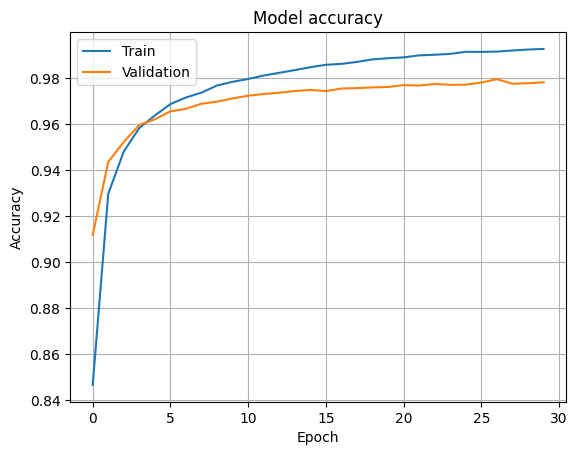

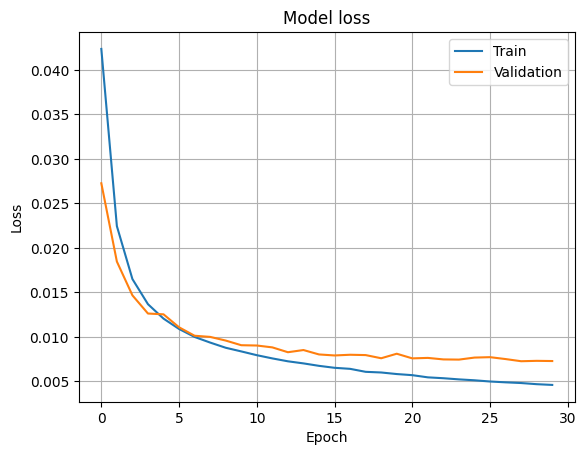

In [20]:
# 5-7.py

import numpy as np
import tensorflow as tf
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 2s - loss: 0.1341 - accuracy: 0.0999 - val_loss: 0.1266 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0692 - accuracy: 0.5358 - val_loss: 0.0310 - val_accuracy: 0.8374 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0272 - accuracy: 0.8575 - val_loss: 0.0284 - val_accuracy: 0.8455 - 1s/epoch - 2ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0248 - accuracy: 0.8696 - val_loss: 0.0257 - val_accuracy: 0.8556 - 1s/epoch - 2ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0236 - accuracy: 0.8766 - val_loss: 0.0240 - val_accuracy: 0.8628 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0225 - accuracy: 0.8812 - val_loss: 0.0255 - val_accuracy: 0.8625 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0215 - accuracy: 0.8861 - val_loss: 0.0237 - val_accuracy: 0.8674 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0206 - accuracy: 0.8905 - val_loss: 0.0230 - val_accuracy: 0.8760 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s 

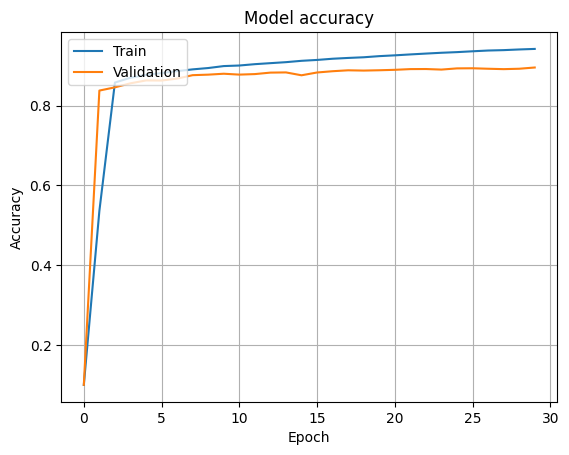

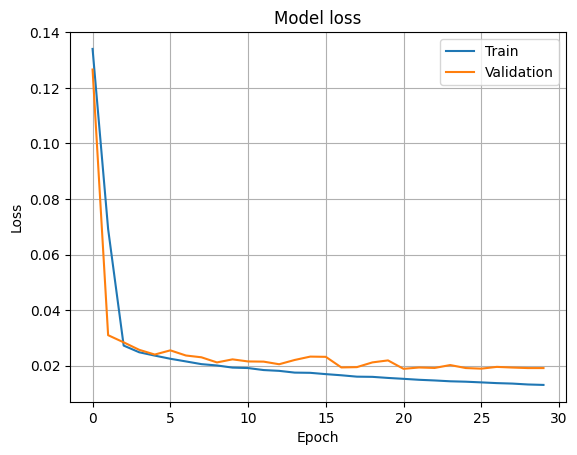

In [22]:
# 5-8.py

import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 2s - loss: 0.0260 - accuracy: 0.8950 - val_loss: 0.0125 - val_accuracy: 0.9459 - 2s/epoch - 5ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0101 - accuracy: 0.9538 - val_loss: 0.0086 - val_accuracy: 0.9600 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0067 - accuracy: 0.9683 - val_loss: 0.0063 - val_accuracy: 0.9683 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0052 - accuracy: 0.9756 - val_loss: 0.0058 - val_accuracy: 0.9695 - 2s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0042 - accuracy: 0.9801 - val_loss: 0.0052 - val_accuracy: 0.9726 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0036 - accuracy: 0.9834 - val_loss: 0.0049 - val_accuracy: 0.9737 - 2s/epoch - 3ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0032 - accuracy: 0.9855 - val_loss: 0.0048 - val_accuracy: 0.9753 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0029 - accuracy: 0.9865 - val_loss: 0.0044 - val_accuracy: 0.9762 - 2s/epoch - 4ms/step
Epoch 9/30
469/469 - 1s 

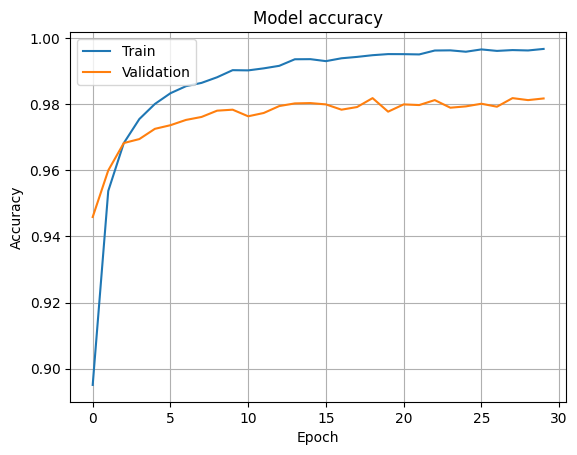

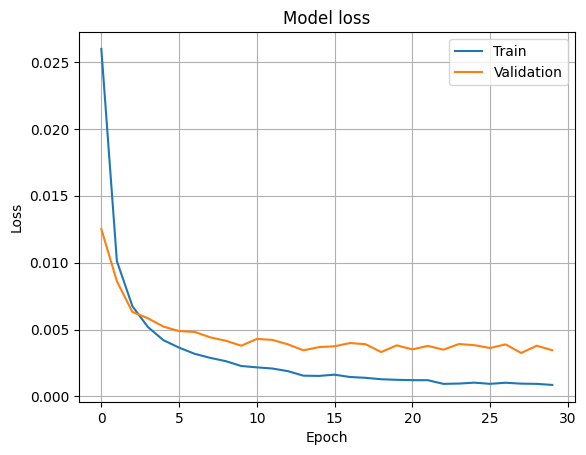

In [23]:
# 5-9.py

import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 2s - loss: 0.0162 - accuracy: 0.8932 - val_loss: 0.0110 - val_accuracy: 0.9277 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0097 - accuracy: 0.9373 - val_loss: 0.0090 - val_accuracy: 0.9428 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0075 - accuracy: 0.9521 - val_loss: 0.0073 - val_accuracy: 0.9537 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0061 - accuracy: 0.9617 - val_loss: 0.0060 - val_accuracy: 0.9594 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0051 - accuracy: 0.9679 - val_loss: 0.0052 - val_accuracy: 0.9670 - 2s/epoch - 5ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0043 - accuracy: 0.9731 - val_loss: 0.0048 - val_accuracy: 0.9682 - 2s/epoch - 5ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0037 - accuracy: 0.9779 - val_loss: 0.0045 - val_accuracy: 0.9702 - 2s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0032 - accuracy: 0.9808 - val_loss: 0.0044 - val_accuracy: 0.9715 - 2s/epoch - 5ms/step
Epoch 9/30
469/469 - 2s 

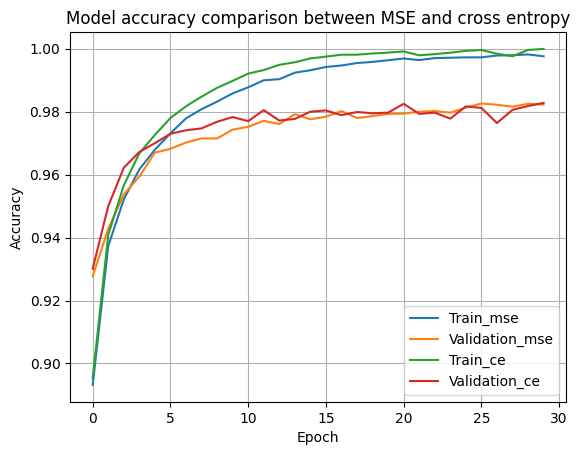

In [24]:
# 5-10.py

import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

Epoch 1/50
235/235 - 1s - loss: 1.3515 - accuracy: 0.6219 - val_loss: 0.8377 - val_accuracy: 0.7157 - 1s/epoch - 6ms/step
Epoch 2/50
235/235 - 1s - loss: 0.7133 - accuracy: 0.7633 - val_loss: 0.6707 - val_accuracy: 0.7710 - 1s/epoch - 4ms/step
Epoch 3/50
235/235 - 1s - loss: 0.6010 - accuracy: 0.7966 - val_loss: 0.5847 - val_accuracy: 0.7997 - 1s/epoch - 4ms/step
Epoch 4/50
235/235 - 1s - loss: 0.5427 - accuracy: 0.8122 - val_loss: 0.5445 - val_accuracy: 0.8104 - 896ms/epoch - 4ms/step
Epoch 5/50
235/235 - 1s - loss: 0.5097 - accuracy: 0.8219 - val_loss: 0.5094 - val_accuracy: 0.8239 - 711ms/epoch - 3ms/step
Epoch 6/50
235/235 - 1s - loss: 0.4866 - accuracy: 0.8311 - val_loss: 0.4987 - val_accuracy: 0.8262 - 688ms/epoch - 3ms/step
Epoch 7/50
235/235 - 1s - loss: 0.4691 - accuracy: 0.8361 - val_loss: 0.5003 - val_accuracy: 0.8250 - 710ms/epoch - 3ms/step
Epoch 8/50
235/235 - 1s - loss: 0.4538 - accuracy: 0.8410 - val_loss: 0.5541 - val_accuracy: 0.7967 - 729ms/epoch - 3ms/step
Epoch 9/5

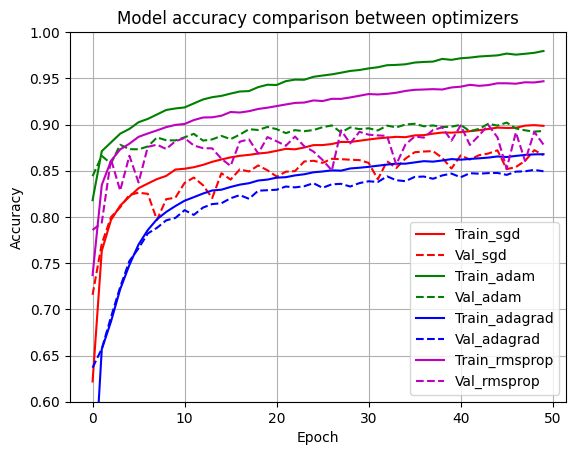

In [25]:
# 5-11.py

import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam,Adagrad,RMSprop

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'], loc='best')
plt.grid()
plt.show()

In [ ]:
# 5-12.py

import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=20
k=5 # 5-겹

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd=cross_validation(SGD())
acc_adam=cross_validation(Adam())
acc_adagrad=cross_validation(Adagrad())
acc_rmsprop=cross_validation(RMSprop())

# 옵티마이저 4개의 정확률을 비교
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt

# 네 옵티마이저의 정확률을 박스플롯으로 비교
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()